#### Imports

In [13]:
import math
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import torch.nn.functional as F
from torch.utils.data import DataLoader
from PIL import Image
import seaborn as sns
import cv2
from kornia.utils import one_hot
from torchvision import transforms

from kedro.extras.datasets.pickle import PickleDataSet
from kedro.config import ConfigLoader

In [22]:
import os, sys
sys.path.append(os.path.abspath('..'))

from src.tagseg.data.acdc_dataset import AcdcDataSet
from src.tagseg.pipelines.data_splitting.nodes import split_data
from src.tagseg.data.utils import directional_field

#### Fetch preprocessed data

In [5]:
conf_paths = ["../conf/base", "../conf/local"]
conf_loader = ConfigLoader(conf_paths)
conf_catalog = conf_loader.get("catalog*", "catalog*/**")

In [6]:
dataset = PickleDataSet(filepath='../' + conf_catalog['acdc_data_tagged']['filepath']).load()

#### Load images and play around

In [7]:
image, label = dataset[50]

In [14]:
loader = DataLoader(dataset, batch_size=8)

In [15]:
images, labels = next(iter(loader))

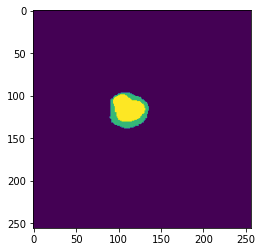

In [17]:
plt.imshow(labels[1])

In [18]:
labels.shape

torch.Size([8, 256, 256])

In [20]:
nlabel = one_hot(labels.long(), 4)
nlabel.shape

torch.Size([8, 4, 256, 256])

In [25]:
df = directional_field(one_hot(labels.long(), 4).numpy())

df.shape

(8, 2, 256, 256)

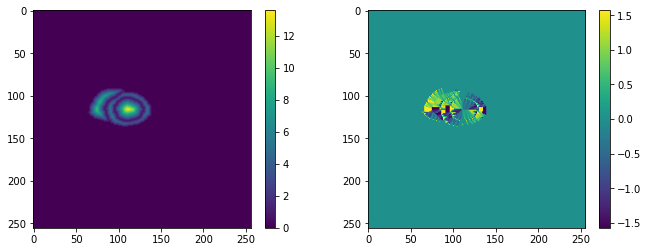

In [28]:
eg = 4

fig, ax = plt.subplots(1, 2, figsize=(11, 4))

pos = []

for i in range(2):
    pos.append(ax[i].imshow(df[eg, i]))

fig.colorbar(pos[0], ax=ax[0])
fig.colorbar(pos[1], ax=ax[1])